                                                                                                        29.04.21 

# Aprendizaje no supervisado


> - Ian Timothy Henry Suárez | A01701578
> - Fernando Guevara Moreno | A00828723

In [32]:
# Importamos las librerias 

import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('fertility_Diagnosis.txt', names=['Season', 'Age', 'Childish diseases', 'Accident', 'Surgical intervention', 'High fevers in the last year', 'Frequency of alcohol consumption', 'Smoking habit', 'Number of hours spent sitting per day', 'Output'])
df

,Season,Age,Childish diseases,Accident,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Season                                 100 non-null    float64
 1   Age                                    100 non-null    float64
 2   Childish diseases                      100 non-null    int64  
 3   Accident                               100 non-null    int64  
 4   Surgical intervention                  100 non-null    int64  
 5   High fevers in the last year           100 non-null    int64  
 6   Frequency of alcohol consumption       100 non-null    float64
 7   Smoking habit                          100 non-null    int64  
 8   Number of hours spent sitting per day  100 non-null    float64
 9   Output                                 100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
# Codificamos la variable de salida Normal - 0, Alterado - 1

encoder = LabelEncoder()
out = encoder.fit_transform(df['Output'])

In [5]:
# Separamos las variables de entrada y de salida

x = df.drop('Output', axis=1)
y = out

# K - Means (Ian)

    K - means es un algoritmo de agrupación de n registros en k grupos. Se establece la cantidad de grupos en los que se dividirán los datos y se agrupan iterativamente de acuerdo al promedio del grupo más cercano al que pertenece el registro. Para establecer el promedio en dimensiones superiores se utiliza la distancia euclidiana. La distancia euclidiana es como un teorema de pitágoras. En nuestro caso se establecieron dos grupos puesto que son los dos posibles resultados que tenemos en nuestra variable dependiente. Para poder visualizar el comportamiento de este algoritmo, estblecemos al principio unicamente dos variables independientes. De esta forma podremos observar el comportamiento de agrumación en el plano. 

In [6]:
# Seleccionamos nuestras variables independientes 

df2 = df.loc[:,['Age', 'Number of hours spent sitting per day']].values

In [17]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 2)
y_kmeans = kmeans.fit_predict(df2)

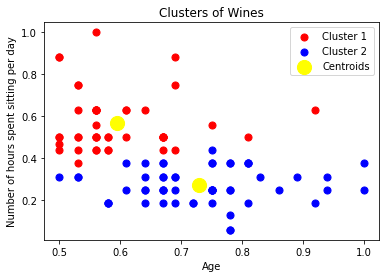

In [8]:
# Visualizamos los clusters

plt.scatter(df2[y_kmeans == 0, 0], df2[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(df2[y_kmeans == 1, 0], df2[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Wines')
plt.xlabel('Age')
plt.ylabel('Number of hours spent sitting per day')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Number of hours spent sitting per day'>

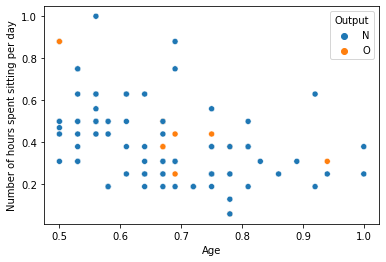

In [9]:
# Visualizamos los datos reales

sns.scatterplot(x=df['Age'], y=df['Number of hours spent sitting per day'], hue=df['Output'])

    Podemos darnos cuenta que en realidad las dos variables que se escogieron no estan muy coorelacionadas con la variable de salida. El algoritmo de k - means no fue muy efectivo para establecer nuestros grupos de forma representativa. 

# Dendrogramas

    El dendrograma es una representacion en forma de arbol que organiza los datos, por las categorias que se le indican, con el objetivo de llegar hasta el valor deseado. 

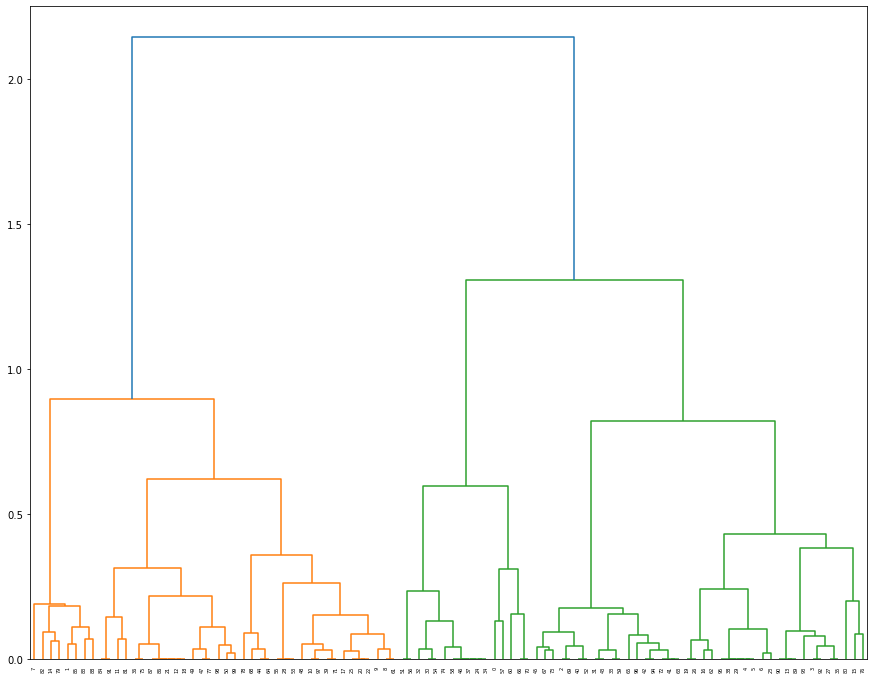

In [49]:
#Creamos el dendograma con la funcion sch

linked = linkage(df2, 'ward')
plt.figure(figsize=(15,12))
dend = sch.dendrogram(linked)

In [36]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df2)

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

Text(0, 0.5, 'Number of hours sitting per day')

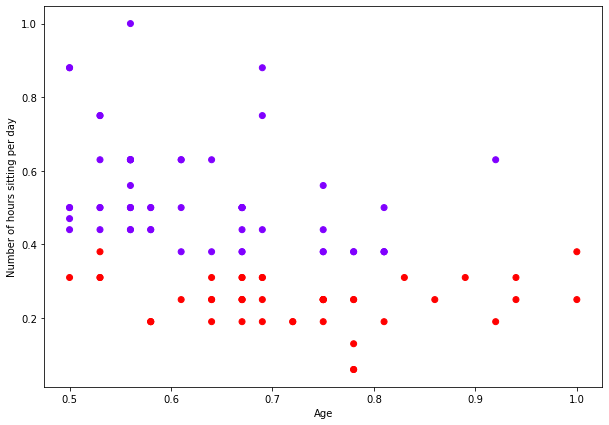

In [51]:
plt.figure(figsize=(10, 7))
plt.scatter(df2[:,0], df2[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Age")
plt.ylabel("Number of hours sitting per day")

Nos damos cuenta que en el grafico se clasifican los datos en dos clusters. En donde los de la parte posterior corresponden a aquellos que fueron diagnosticados Normal, mientras que los otros pertenecen al diagnostico Alterado.